In [33]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r'C:\Users\sharm\OneDrive\Documents\datasets\Police_Data.csv')

In [34]:
df

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,NaN,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65531,12/6/2012,22:22,NaN,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
65532,12/6/2012,23:20,NaN,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


In [35]:
#remove the column that contains mising values
df.isnull().sum() #country_name is completely null 
df.drop(columns='country_name', inplace= True)

In [36]:
df.columns #to check country_name column is deleted

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [37]:
#for speeding, were men or women stopped often
df[df['violation']=='Speeding'].driver_gender.value_counts()


M    25517
F    11686
Name: driver_gender, dtype: int64

In [38]:
#does gender affect who gets searced during a stop?
df[df['search_conducted']==True].driver_gender.value_counts()
#another way
df.groupby('driver_gender').search_conducted.sum()

driver_gender
F     366
M    2113
Name: search_conducted, dtype: int64

In [39]:
#what is mean stop duration
df['stop_duration'].value_counts() #to count the dnumber of different values

0-15 Min     47379
16-30 Min    11448
30+ Min       2647
2                1
Name: stop_duration, dtype: int64

In [40]:
#replacing the range columns with their avg values
df['stop_duration']=df['stop_duration'].map({'0-15 Min':7.5,'16-30 Min':24,'30+ Min':45})

In [41]:
#mean stop duration
df['stop_duration'].mean()

12.187420698181345

In [42]:
#compare the age distributions for each violation
df.groupby('violation').describe()

driver_age_raw                                           \
                             count         mean         std     min     25%   
violation                                                                     
Equipment                   6515.0  1975.935380   65.818854     0.0  1971.0   
Moving violation           11926.0  1965.462770  120.359733     0.0  1963.0   
Other                       3583.0  1912.442088  329.302162     0.0  1959.0   
Registration/plates         2243.0  1973.686135   73.103745     0.0  1969.0   
Seat belt                      3.0  1981.666667   10.214369  1970.0  1978.0   
Speeding                   37204.0  1972.189711   86.672468     0.0  1966.0   

                                            driver_age             ...        \
                        50%     75%     max      count       mean  ...   75%   
violation                                                          ...         
Equipment            1981.0  1987.0  2005.0     6507.0  31.682957  ...  39.0   
Moving violation     1974.0  1984.0  2006.0    11876.0  36.736443  ...  47.0   
Other                1968.0  1979.0  2011.0     3477.0  40.362381  ...  50.0   
Registration/plates  1979.0  1985.0  1996.0     2240.0  32.656696  ...  40.0   
Seat belt            1986.0  1987.5  1989.0        3.0  30.333333  ...  34.0   
Speeding             1979.0  1985.0  8801.0    37120.0  33.262581  ...  42.0   

                          stop_duration                                       \
                      max         count       mean        std  min  25%  50%   
violation                                                                      
Equipment            81.0        6516.0  12.337707   9.936480  7.5  7.5  7.5   
Moving violation     86.0       11925.0  14.855723  11.912066  7.5  7.5  7.5   
Other                86.0        3583.0  17.218392  13.169321  7.5  7.5  7.5   
Registration/plates  74.0        2243.0  15.752341  11.444055  7.5  7.5  7.5   
Seat belt            42.0           3.0   7.500000   0.000000  7.5  7.5  7.5   
Speeding             88.0       37204.0  10.606763   7.223115  7.5  7.5  7.5   

                                 
                      75%   max  
violation                        
Equipment             7.5  45.0  
Moving violation     24.0  45.0  
Other                24.0  45.0  
Registration/plates  24.0  45.0  
Seat belt             7.5   7.5  
Speeding              7.5  45.0  

[6 rows x 24 columns]

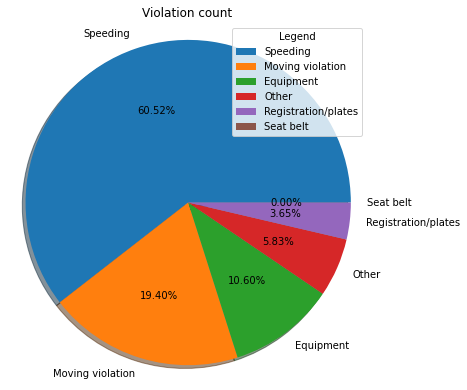

In [76]:
#pie chart for violation count
Violation=df['violation'].value_counts()
Violation.reset_index()
fig=plt.figure(figsize=(5,5))
fig.add_axes([0,0,1,1])
plt.pie(Violation.values,labels=Violation.index,shadow=True,labeldistance=1.1,autopct='%.2f%%')
plt.title('Violation count')
plt.legend( title = 'Legend',loc= 'upper right')
plt.axis('equal')
plt.show()

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   driver_gender       61474 non-null  object 
 3   driver_age_raw      61481 non-null  float64
 4   driver_age          61228 non-null  float64
 5   driver_race         61475 non-null  object 
 6   violation_raw       61475 non-null  object 
 7   violation           61475 non-null  object 
 8   search_conducted    65535 non-null  bool   
 9   search_type         2479 non-null   object 
 10  stop_outcome        61475 non-null  object 
 11  is_arrested         61475 non-null  object 
 12  stop_duration       61474 non-null  float64
 13  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(3), object(9)
memory usage: 6.1+ MB


In [99]:
a=df[df['violation']=='Speeding']
a

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
6,4/1/2005,17:30,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65527,12/6/2012,15:26,F,1981.0,31.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
65529,12/6/2012,16:00,M,1994.0,18.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
65530,12/6/2012,17:54,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
65531,12/6/2012,22:22,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,7.5,False
